# Plant-pollinator project
Plant-pollinator networks describe the interaction between different types of pollinators and plants of a certain territory. It is possible to represent it as a bipartite network with two node types: plant nodes (green), pollinator nodes (red).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import utils
import motifs

%matplotlib inline

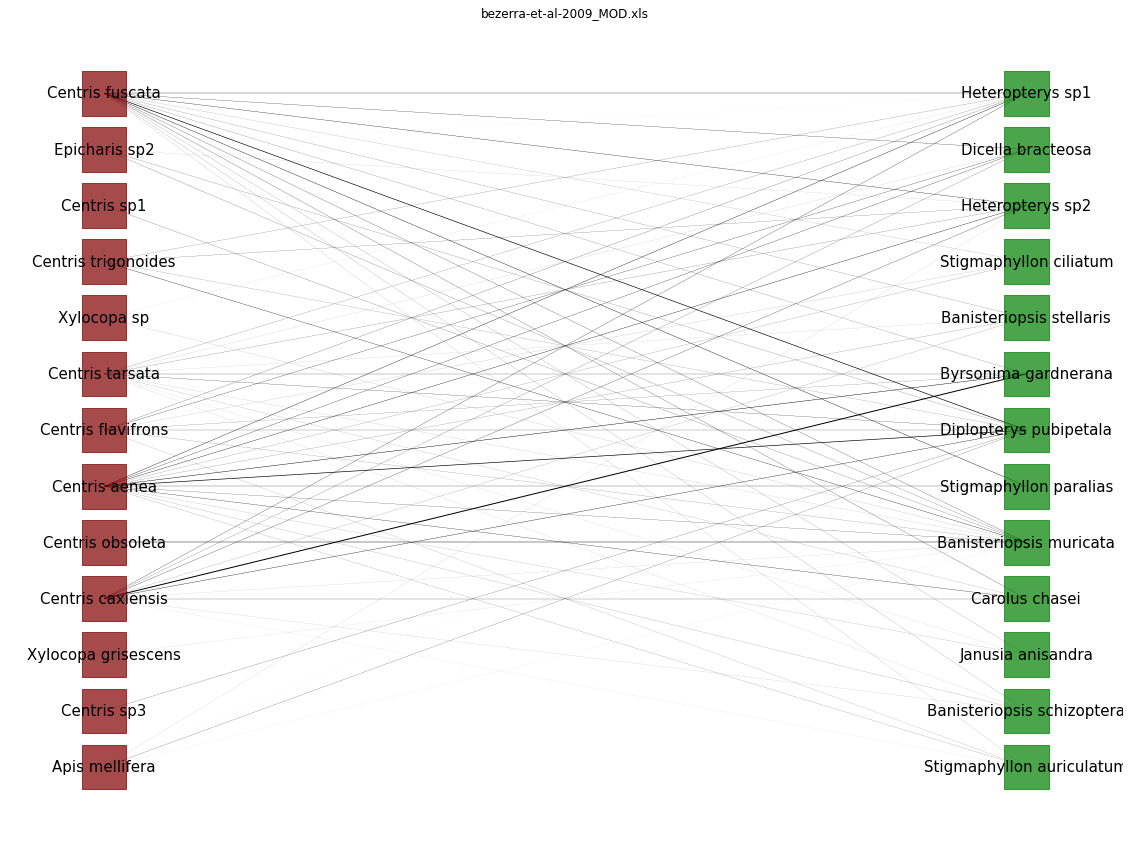

In [2]:
DATA_FOLDER = '../dataset/'
DATASET = 'bezerra-et-al-2009_MOD.xls'
path = DATA_FOLDER + DATASET

# plot a bipartite graph
G, pol, pla = utils.build_graph_from_xls(path, verbose=False)
utils.plot_bipartite_graph(G, pol, title=DATASET)
plt.show()

## Centralities
The first thing we tried to understand is which are the most important plants and pollinators of the network. The "importance" of a node can be measured by different types of centralities. For example we can consider nodes with the highest degree as the most important since they have the most number of connections in the network...

In [3]:
dc = utils.degree_centrality(G)
cc, bc = utils.compute_centralities(G)
Bc = utils.compute_birank_centrality(G)
centralities = [dc, cc, bc]
centralities_names = ['dc', 'cc', 'bc']

K = 5

In [4]:
# Top K pollinators in the network according to different centralities
df_pol = utils.top_K_nodes_df(G, centralities, centralities_names, K=K, all_nodes=False, show_value=False, only_pollinators=True)
df_pol.join(Bc[0]['pollinators']).rename(
    columns={'dc' : 'degree centrality',
             'cc' : 'closeness centrality',
             'bc' : 'betweenness centrality',
             'pollinators': 'BiRank centrality'
             })

,degree centrality,closeness centrality,betweenness centrality,BiRank centrality
1,Centris aenea,Centris aenea,Centris aenea,Centris fuscata
2,Centris fuscata,Centris fuscata,Centris fuscata,Centris caxiensis
3,Centris caxiensis,Centris caxiensis,Centris tarsata,Centris tarsata
4,Centris tarsata,Centris tarsata,Centris caxiensis,Centris flavifrons
5,Centris flavifrons,Centris flavifrons,Centris flavifrons,Centris trigonoides


In [5]:
# Top K plants in the network according to different centralities
df_pla = utils.top_K_nodes_df(G, centralities, centralities_names, K=K, all_nodes=False, show_value=False, only_plants=True)
df_pla.join(Bc[1]['plants']).rename(
    columns={'dc' : 'degree centrality',
             'cc' : 'closeness centrality',
             'bc' : 'betweenness centrality',
             'plants': 'BiRank centrality'
             })

,degree centrality,closeness centrality,betweenness centrality,BiRank centrality
1,Banisteriopsis muricata,Banisteriopsis muricata,Banisteriopsis muricata,Byrsonima gardnerana
2,Diplopterys pubipetala,Diplopterys pubipetala,Diplopterys pubipetala,Banisteriopsis muricata
3,Heteropterys sp1,Heteropterys sp1,Heteropterys sp1,Heteropterys sp1
4,Heteropterys sp2,Heteropterys sp2,Heteropterys sp2,Heteropterys sp2
5,Byrsonima gardnerana,Byrsonima gardnerana,Byrsonima gardnerana,Dicella bracteosa


In [6]:
MAX_NODE_SIZE = 2500

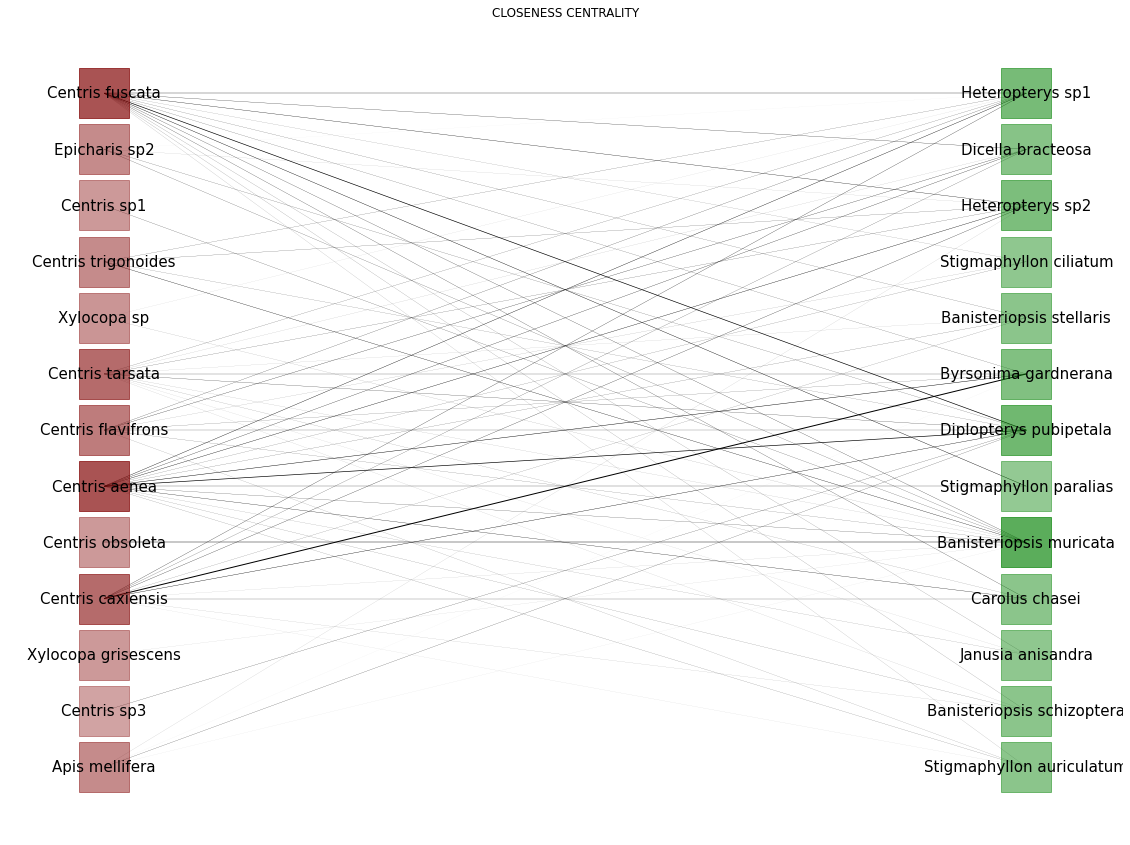

In [7]:
utils.plot_centrality_graph(G, pol, cc, size=False, max_node_size=MAX_NODE_SIZE, title='CLOSENESS CENTRALITY')

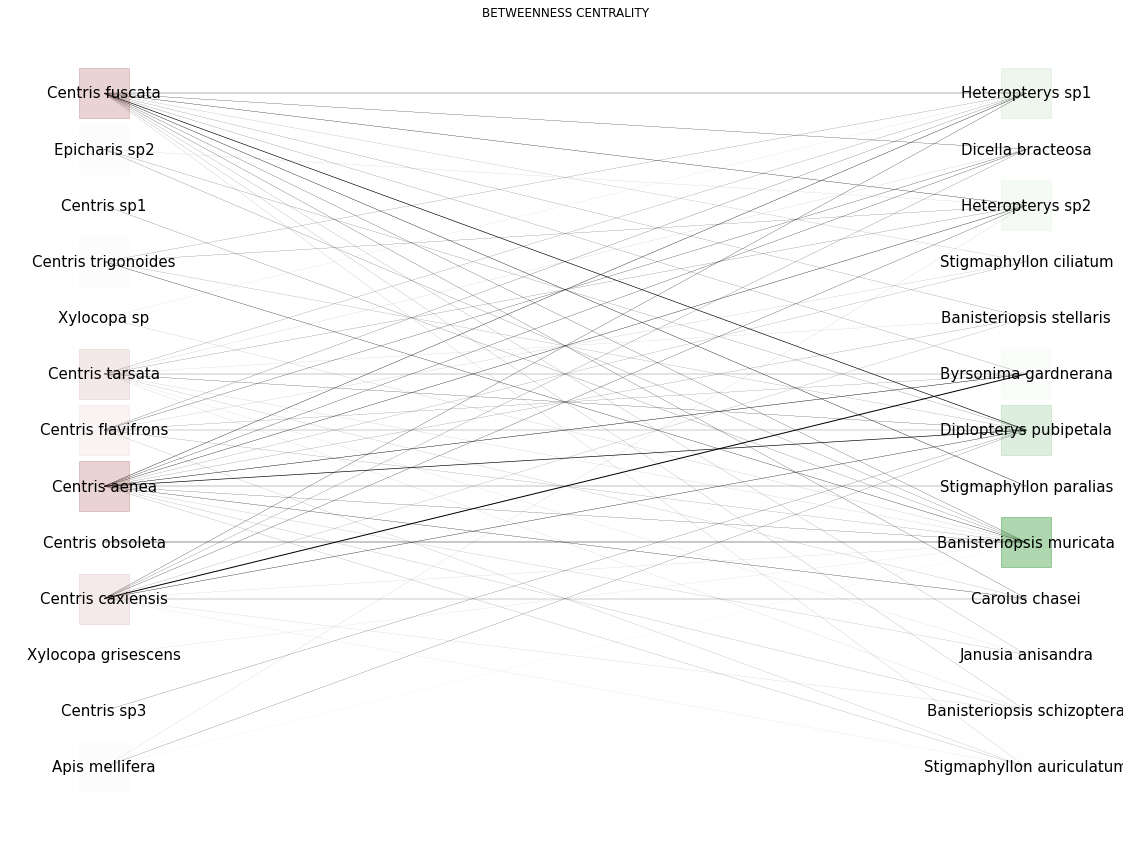

In [8]:
utils.plot_centrality_graph(G, pol, bc, size=False, max_node_size=MAX_NODE_SIZE,title='BETWEENNESS CENTRALITY')

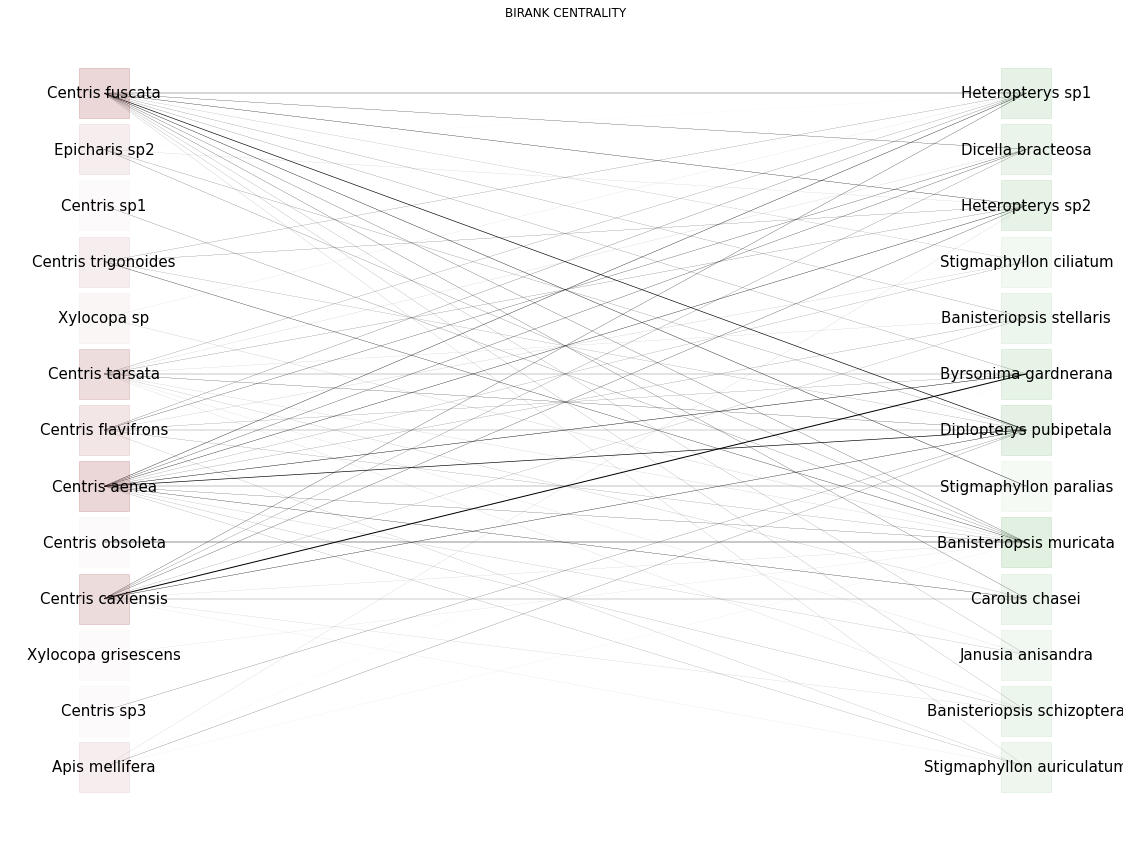

In [9]:
Bc[0]
bi_pol = {node: rank for node, rank in zip(Bc[0]['pollinators'], Bc[0]['pollinators_birank'])}
bi_pla = {node: rank for node, rank in zip(Bc[1]['plants'], Bc[1]['plants_birank'])}
BI = dict(list(bi_pol.items()) + list(bi_pla.items()))
utils.plot_centrality_graph(G, pol, BI, size=False, max_node_size=MAX_NODE_SIZE, title='BIRANK CENTRALITY')

In [10]:
# Load all the datasets
PATHS, FILE_NAMES = utils.load_paths(DATA_FOLDER)
Graphs, pollinators, plants = utils.build_all_graphs(PATHS)

In [11]:
# Computes the top K pollinators and plants among all the datasets
top_K_pol = []
top_K_pla = []
for i in range(len(Graphs)):
    _, c = utils.compute_centralities(Graphs[i])

    c_pol = {node : c[node] for node in nx.bipartite.sets(Graphs[i])[0]} # get the centrality value  for pollinators
    c_pla = {node : c[node] for node in nx.bipartite.sets(Graphs[i])[1]} # get the centrality value  for plants
    
    c_pol = sorted(c_pol.items(), key=lambda x: x[1], reverse=True )     # sort nodes according to their centrality value
    c_pla = sorted(c_pla.items(), key=lambda x: x[1], reverse=True )     # from the highest to the lowest
    
    # Consider just the node's name
    c_pol = [element[0] for element in c_pol]
    c_pla = [element[0] for element in c_pla]
    
    top_K_pol.append(c_pol[0:K])
    top_K_pla.append(c_pla[0:K])

In [12]:
# Top K pollinators among all the datasets
d = {name : col for name, col in zip(FILE_NAMES, top_K_pol)}
pd.DataFrame(data=d, index=range(1, K+1))

,bezerra-et-al-2009_MOD.xls,olesen_aigrettes_MOD.xls,olesen_flores_MOD.xls
1,Centris aenea,Apis mellifera,Halictus sp.
2,Centris fuscata,Phelsuma ornata,Sepsis thoracica
3,Centris tarsata,Stratiomydae sp.,Musca domestica
4,Centris caxiensis,Leptotes pirithous,Colias crocea
5,Centris flavifrons,Syrphid sp.,Bombus ruderatus


In [13]:
# Top K plants among all the datasets
d = {name : col for name, col in zip(FILE_NAMES, top_K_pla)}
pd.DataFrame(data=d, index=range(1, K+1))

,bezerra-et-al-2009_MOD.xls,olesen_aigrettes_MOD.xls,olesen_flores_MOD.xls
1,Banisteriopsis muricata,Gastonia mauritiana,Azorina vidalii
2,Diplopterys pubipetala,Pemphis acidula,Crithmum maritimum
3,Heteropterys sp1,Stachytapheta jamaicencis,Chamomilla suaveolens
4,Heteropterys sp2,Scaevola sericea,Solidago sempervivens
5,Byrsonima gardnerana,Thespesia populnea,Daucus carota


## Motifs

## Clustering coefficient

## Random graphs